In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('train.csv',  sep='\t', encoding='utf-8')

In [3]:
df.head()

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


In [4]:
df.shape

(4987, 2)

In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
df['label'].value_counts()

label
0        2972
1        2014
label       1
Name: count, dtype: int64

In [7]:
df['label'].replace('label',1,inplace=True)

C:\Users\Minhaz\AppData\Local\Temp\ipykernel_824\2022348690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['label'].replace('label',1,inplace=True)


In [8]:
df['label'] = df['label'].astype(int)

<Axes: xlabel='label'>

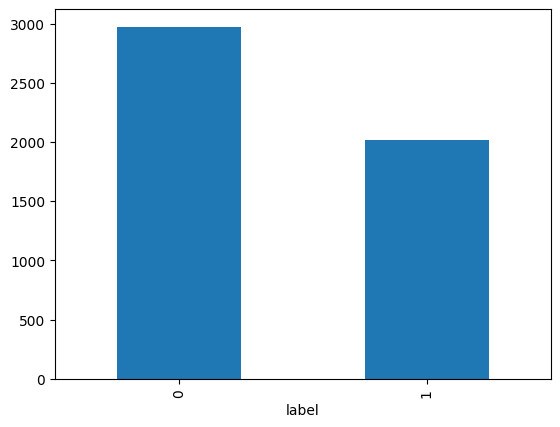

In [9]:
df['label'].value_counts().plot(kind='bar')

In [10]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
# from textblob import TextBlob
import re

In [11]:
def transform(text):
    # lowercasing
    text = text.lower()
    # removing numbers
    text = re.sub(r'\d+','',text)
    # punctuation remove
    for p in string.punctuation:
        text = text.replace(p,'')
    # stopword remove and stemmimg
    new_text = []
    for word in text.split():
        if word not in stopwords.words('english'):
            new_text.append(ps.stem(word))
    text = ' '.join(new_text)
    # spelling correction
    return text
    

In [12]:
df['clean_text'] = df['text'].apply(transform)

# new column

In [13]:
df['len'] = df['clean_text'].apply(lambda x: len(x))
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

In [14]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag  
from nltk.tokenize import word_tokenize

In [15]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

def pos_count(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    unique_pos_tags = set(tag for word, tag in tagged_words)
    return len(unique_pos_tags)

In [16]:
def simple_transform(text):
    text = text.lower()
    for p in string.punctuation:
        text = text.replace(p,'')
    text = re.sub(r'\d+','',text)
    return text

In [17]:
df['text_for_pos'] = df['text'].apply(simple_transform)

In [18]:
df['pos_count'] = df['text_for_pos'].apply(pos_count)

# EDA

C:\Users\Minhaz\AppData\Local\Temp\ipykernel_824\994757271.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['label'] == 0]['len'],hist=False)
C:\Users\Minhaz\AppData\Local\Temp\ipykernel_824\994757271.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['label'] =

<Axes: xlabel='len', ylabel='Density'>

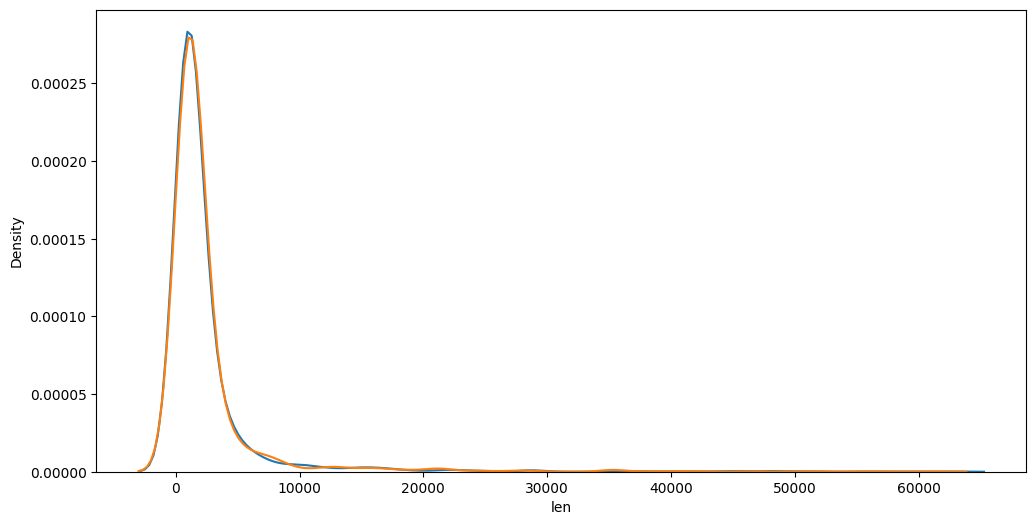

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['label'] == 0]['len'],hist=False)
sns.distplot(df[df['label'] == 1]['len'],hist=False)

C:\Users\Minhaz\AppData\Local\Temp\ipykernel_824\2705260067.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['label'] == 0]['word_count'],hist=False)
C:\Users\Minhaz\AppData\Local\Temp\ipykernel_824\2705260067.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['

<Axes: xlabel='word_count', ylabel='Density'>

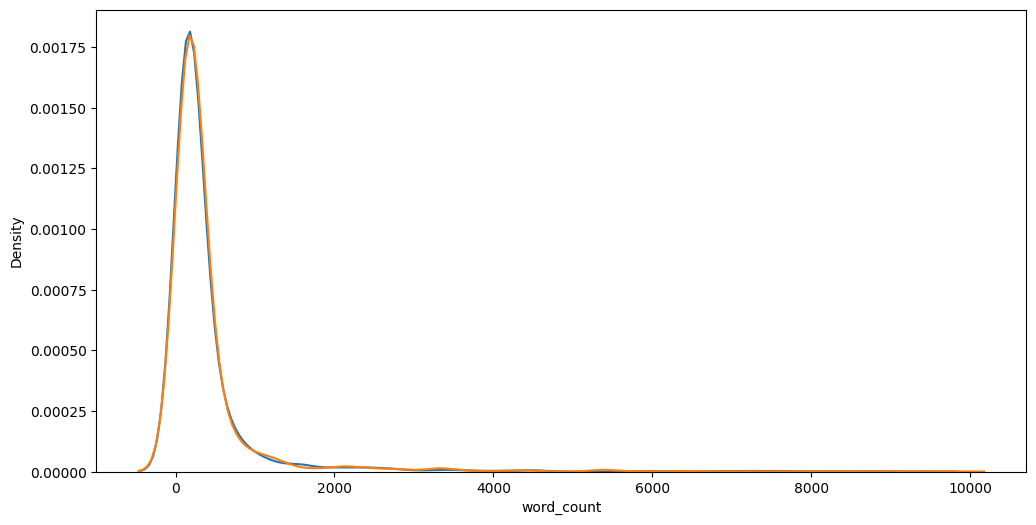

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['label'] == 0]['word_count'],hist=False)
sns.distplot(df[df['label'] == 1]['word_count'],hist=False)

C:\Users\Minhaz\AppData\Local\Temp\ipykernel_824\424884856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['label'] == 0]['pos_count'],hist=False)
C:\Users\Minhaz\AppData\Local\Temp\ipykernel_824\424884856.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['lab

<Axes: xlabel='pos_count', ylabel='Density'>

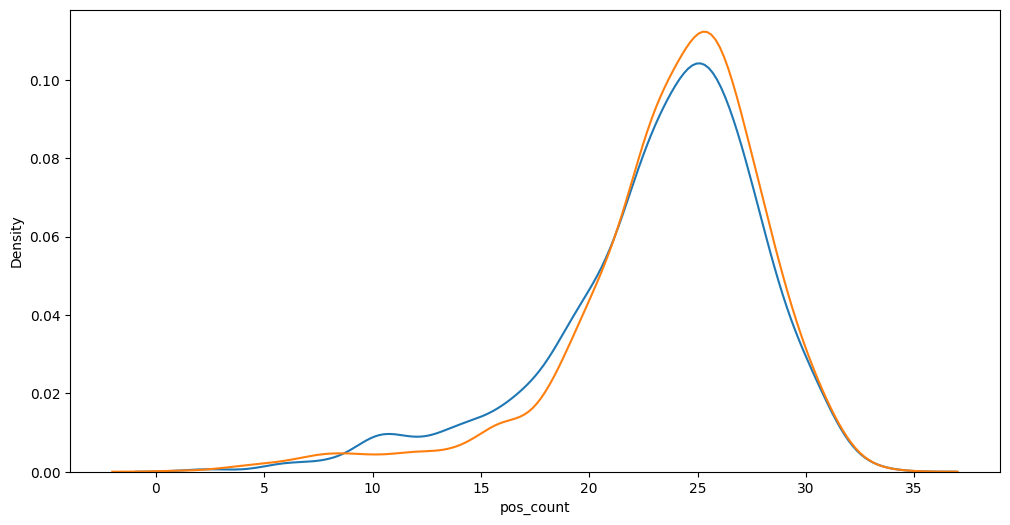

In [21]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['label'] == 0]['pos_count'],hist=False)
sns.distplot(df[df['label'] == 1]['pos_count'],hist=False)

In [22]:
df[['word_count','len','label']].corr()

,word_count,len,label
word_count,1.000000,0.999367,0.005220
len,0.999367,1.000000,0.006085
label,0.005220,0.006085,1.000000


In [23]:
df.drop(columns=['word_count','len'],inplace=True)

In [24]:
df[['pos_count','label']].corr()

,pos_count,label
pos_count,1.00000,0.05316
label,0.05316,1.00000


# Feature Engineering

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [26]:
arr = tfidf.fit_transform(df['clean_text']).toarray()

In [27]:
final = pd.DataFrame(arr,index=df['clean_text'].index)
final = pd.concat([final,df['pos_count']],axis=1)

In [28]:
x = final

In [29]:
y = df['label']

# Model Building

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)
x_train = np.array(x_train)
x_test = np.array(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [32]:
models = {
    'lr': LogisticRegression(),
    'dtc': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(n_estimators=50, random_state=44),
    'etc': ExtraTreesClassifier(n_estimators=50, random_state=44),
    'xgb': XGBClassifier(n_estimators=50, random_state=44),
    'S': SVC(),
    'mnb': MultinomialNB(),
    'bnb': BernoulliNB(),
    'gnb': GaussianNB()
}

In [33]:
def train_model(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    return acc,pre

In [34]:
accuracy = []
precision = []
algorithms = []
for name,algorithm in models.items():
    current_accuracy,current_precision = train_model(algorithm,x_train,x_test,y_train,y_test)
    print('for',name)
    print('Accuracy :',current_accuracy)
    print('Precision :',current_precision)
    algorithms.append(name)
    accuracy.append(current_accuracy)
    precision.append(current_precision)

c:\Users\Minhaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


for lr
Accuracy : 0.7575150300601202
Precision : 0.788961038961039
for dtc
Accuracy : 0.6713426853707415
Precision : 0.6100478468899522
for rf
Accuracy : 0.7605210420841684
Precision : 0.8175438596491228
for etc
Accuracy : 0.7615230460921844
Precision : 0.8159722222222222
for xgb
Accuracy : 0.7595190380761523
Precision : 0.7616279069767442


c:\Users\Minhaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


for S
Accuracy : 0.5791583166332666
Precision : 0.0
for mnb
Accuracy : 0.7324649298597194
Precision : 0.7647058823529411
for bnb
Accuracy : 0.7234468937875751
Precision : 0.7093023255813954
for gnb
Accuracy : 0.7094188376753507
Precision : 0.6382978723404256


In [35]:
result = pd.DataFrame({'Algorithm': algorithms,'Accuracy': accuracy,'Precision': precision})

In [36]:
result.sort_values(by='Precision',ascending=False)

,Algorithm,Accuracy,Precision
2,rf,0.760521,0.817544
3,etc,0.761523,0.815972
0,lr,0.757515,0.788961
6,mnb,0.732465,0.764706
4,xgb,0.759519,0.761628
7,bnb,0.723447,0.709302
8,gnb,0.709419,0.638298
1,dtc,0.671343,0.610048
5,S,0.579158,0.000000


In [37]:
from sklearn.ensemble import VotingClassifier

In [38]:
rn = RandomForestClassifier(n_estimators=100,random_state=44)
etc = ExtraTreesClassifier(n_estimators=100,random_state=44)
lr = LogisticRegression()

In [39]:
voting = VotingClassifier(estimators=[('rn',rn),('etc',etc),('lr',lr)])

In [40]:
voting.fit(x_train,y_train)

c:\Users\Minhaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rn', RandomForestClassifier(random_state=44)),
                             ('etc', ExtraTreesClassifier(random_state=44)),
                             ('lr', LogisticRegression())])

In [41]:
y_pred = voting.predict(x_test)

In [42]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.7735470941883767
0.8299319727891157


In [43]:
from sklearn.ensemble import StackingClassifier
rn = RandomForestClassifier(n_estimators=100, random_state=44)
etc = ExtraTreesClassifier(n_estimators=100, random_state=44)
lr = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=[('rf', rn), ('etc', etc), ('lr', lr)],
    final_estimator=LogisticRegression()
)


# Fit the stacking model on the training data
stacking_model.fit(x_train, y_train)

# Make predictions
y_pred = stacking_model.predict(x_test)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Change to 'micro' or 'macro' if needed

# Print the results
print(f"Stacking Model Accuracy: {accuracy}")
print(f"Stacking Model Precision: {precision}")

c:\Users\Minhaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Minhaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Stacking Model Accuracy: 0.7665330661322646
Stacking Model Precision: 0.7676734752489388


In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the ANN model
model = Sequential()
model.add(Dense(3000, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1123, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(723, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='softmax'))  # For categorical y_train

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
  
# Train the model
history = model.fit(x_train, y_train, epochs=20,validation_split=0.2, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(x_train, y_train)
print(f"Loss (MSE): {loss}")
print(f"Mean Absolute Error (MAE): {mae}")

Epoch 1/20


c:\Users\Minhaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - accuracy: 0.3992 - loss: 0.6008 - val_accuracy: 0.3860 - val_loss: 0.6140
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.3873 - loss: 0.6127 - val_accuracy: 0.3860 - val_loss: 0.6140
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.4101 - loss: 0.5899 - val_accuracy: 0.3860 - val_loss: 0.6140
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.4098 - loss: 0.5902 - val_accuracy: 0.3860 - val_loss: 0.6140
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.3958 - loss: 0.6042 - val_accuracy: 0.3860 - val_loss: 0.6140
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.4061 - loss: 0.5939 - val_accuracy: 0.3860 - val_loss: 0.6140
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.4075 - loss: 0.5925 - val_accuracy: 0.3860 - val_loss: 0.6140
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - accuracy: 0.4035 - loss: 0.5965 - val

In [58]:
y_pred = model.predict(x_test)

 7/32 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

c:\Users\Minhaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


c:\Users\Minhaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [59]:
accuracy_score(y_test,y_pred)

0.42084168336673344

In [60]:
precision_score(y_test, y_pred, average='weighted')

c:\Users\Minhaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.17710772245894596